In [25]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('datasets/final_data.csv')
df.head()

,id_count,intake_type,animal_type,intake_sex,intake_age,breed,color,is_named,intake_year,intake_month,intake_day,outcome_type,outcome_sex,outcome_age,outcome_year,outcome_month,outcome_day
0,A006100-1,3,2,2,6.0,2438,597,1,2014,3,0,6,2,6.0,2014,3,2
1,A006100-2,3,2,2,7.0,2438,597,1,2014,12,0,6,2,7.0,2014,12,2
2,A006100-3,4,2,2,1.0,2438,597,1,2017,12,4,6,2,1.0,2017,12,4
3,A047759-1,2,2,2,1.0,1033,512,1,2014,4,6,8,2,1.0,2014,4,1
4,A134067-1,3,2,2,1.0,2317,203,1,2013,11,2,6,2,1.0,2013,11,2


In [27]:
y = df['outcome_type']
X = df.drop(['outcome_type','id_count'], axis = 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=43)

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X.shape

(127889, 15)

In [31]:
model = Sequential()
model.add(Dense(activation = "relu", input_dim = 15, units = 100))
model.add(Dropout(rate=0.2))
model.add(Dense(activation = "relu", units = 80))
model.add(Dropout(rate=0.4))
model.add(Dense(activation = "softmax", units = 25))
model.add(Dense(activation = "softmax", units = 9))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               1600      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 80)                8080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 25)                2025      
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 234       
Total params: 11,939
Trainable params: 11,939
Non-trainable params: 0
__________________________________________________

In [33]:
model.compile(optimizer = 'adam' ,  loss='sparse_categorical_crossentropy', metrics=['acc'] )

In [34]:
early_stop = EarlyStopping(patience=5)

In [35]:
history= model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10,batch_size=9,callbacks=[early_stop]);

Epoch 1/10
9947/9947 [==============================] - 24s 2ms/step - loss: 0.9352 - acc: 0.6983 - val_loss: 0.7999 - val_acc: 0.7422
Epoch 2/10
9947/9947 [==============================] - 22s 2ms/step - loss: 0.7862 - acc: 0.7406 - val_loss: 0.7555 - val_acc: 0.7511
Epoch 3/10
9947/9947 [==============================] - 23s 2ms/step - loss: 0.7551 - acc: 0.7462 - val_loss: 0.7275 - val_acc: 0.7551
Epoch 4/10
9947/9947 [==============================] - 21s 2ms/step - loss: 0.7388 - acc: 0.7482 - val_loss: 0.7201 - val_acc: 0.7574
Epoch 5/10
9947/9947 [==============================] - 30s 3ms/step - loss: 0.7316 - acc: 0.7499 - val_loss: 0.7143 - val_acc: 0.7576
Epoch 6/10
9947/9947 [==============================] - 30s 3ms/step - loss: 0.7248 - acc: 0.7528 - val_loss: 0.7132 - val_acc: 0.7574
Epoch 7/10
9947/9947 [==============================] - 28s 3ms/step - loss: 0.7224 - acc: 0.7531 - val_loss: 0.7076 - val_acc: 0.7586
Epoch 8/10
9947/9947 [==============================] -

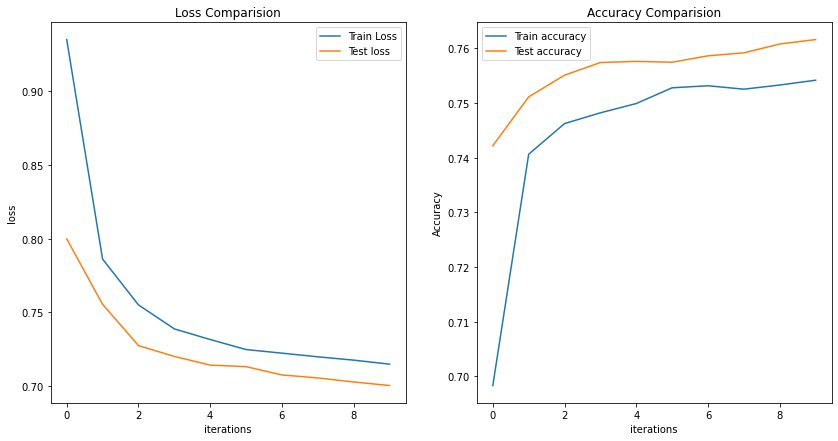

In [36]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('iterations') 
plt.ylabel('loss') 
plt.title("Loss Comparision")
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.xlabel('iterations') 
plt.ylabel('Accuracy') 
plt.title("Accuracy Comparision")
plt.legend();

In [37]:
model.save("my_model.h5")

In [38]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=9)
print("Loss : ", loss)
print("accuracy : ", accuracy)

4263/4263 [==============================] - 5s 1ms/step - loss: 0.7004 - acc: 0.7616
Loss :  0.700409471988678
accuracy :  0.7615919709205627
